In [1]:
from histocartography.io.wsi import WSI
import matplotlib.pyplot as plt

import numpy as np

import cv2

import seaborn as sns

In [2]:
img = WSI('../datasets/cam16_selected/tumor_105.tif', minimum_tissue_content=.05)

2019-11-01 08:59:08,519 - Histocartography::IO::WSI - DEBUG - wsi_file : ../datasets/cam16_selected/tumor_105.tif
2019-11-01 08:59:08,549 - Histocartography::IO::WSI - DEBUG - Original mag: 1
2019-11-01 08:59:08,558 - Histocartography::IO::WSI - DEBUG - Levels: 9
2019-11-01 08:59:08,560 - Histocartography::IO::WSI - DEBUG - Level dimensions ((106496, 93184), (53248, 46592), (26624, 23296), (13312, 11648), (6656, 5824), (3328, 2912), (1664, 1456), (832, 728), (416, 364))


In [7]:
for key, value in img.stack.properties.items():
    print("{}: {}".format(key, value))

openslide.level-count: 9
openslide.level[0].downsample: 1
openslide.level[0].height: 93184
openslide.level[0].tile-height: 512
openslide.level[0].tile-width: 512
openslide.level[0].width: 106496
openslide.level[1].downsample: 2
openslide.level[1].height: 46592
openslide.level[1].tile-height: 512
openslide.level[1].tile-width: 512
openslide.level[1].width: 53248
openslide.level[2].downsample: 4
openslide.level[2].height: 23296
openslide.level[2].tile-height: 512
openslide.level[2].tile-width: 512
openslide.level[2].width: 26624
openslide.level[3].downsample: 8
openslide.level[3].height: 11648
openslide.level[3].tile-height: 512
openslide.level[3].tile-width: 512
openslide.level[3].width: 13312
openslide.level[4].downsample: 16
openslide.level[4].height: 5824
openslide.level[4].tile-height: 512
openslide.level[4].tile-width: 512
openslide.level[4].width: 6656
openslide.level[5].downsample: 32
openslide.level[5].height: 2912
openslide.level[5].tile-height: 512
openslide.level[5].tile-widt

In [3]:
size = 512
patches = img.patches(mag=1,
                      size=(size, size),
                      stride=(size, size))

2019-10-31 16:39:28,023 - Histocartography::IO::WSI - DEBUG - Level for desired resolution : 0
2019-10-31 16:39:28,023 - Histocartography::IO::WSI - DEBUG - Step size : 512 512
2019-10-31 16:39:28,024 - Histocartography::IO::WSI - DEBUG - Num Patches : 182 208
2019-10-31 16:39:28,033 - Histocartography::IO::WSI - DEBUG - Level for desired resolution : 5
2019-10-31 16:39:28,537 - Histocartography::IO::WSI - DEBUG - Image shape after loading (2912, 3328, 3)
x: 0, y: 93184
x: 0, y: 93696
x: 0, y: 94208
x: 0, y: 94720
x: 0, y: 95232
x: 0, y: 95744
x: 0, y: 96256
x: 0, y: 96768


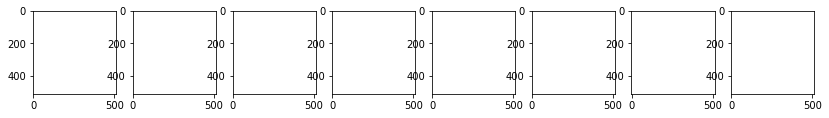

In [4]:
plt.figure(figsize=(14, 14))
for i in range(8):
    patch = next(patches)
    plt.subplot(1, 8, i+1)
    plt.imshow(patch[6], vmin=0, vmax=255)
    print("x: {}, y: {}".format(patch[0], patch[1]))

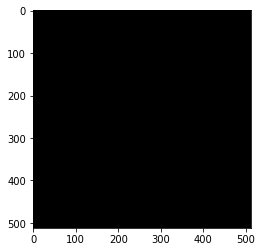

In [5]:
gray = cv2.cvtColor(patch[6], cv2.COLOR_RGB2GRAY)
plt.imshow(gray, vmin=0, vmax=255, cmap='gray')

In [6]:
gray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
def test_region(region, threshold):
    gray = cv2.cvtColor(region, cv2.COLOR_RGB2GRAY)
    num_pixs = np.sum(gray < threshold)
    print(num_pixs)
    print(num_pixs/(512**2))

In [34]:
patch1, labels = img.get_patch_with_labels(1, 1, (32000, 29000), (512, 512))
patch2, lables = img.get_patch_with_labels(1, 3, (0, 0), (512, 512))

In [35]:
patch1.shape

(512, 512, 4)

In [36]:
patch2.shape

(512, 512, 4)

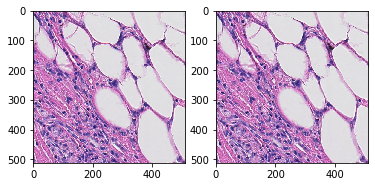

In [37]:
plt.subplot(121)
plt.imshow(patch1[:,:,0:3], vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(patch1[:,:,:], vmin=0, vmax=255)

In [25]:
test_region(patch1, 83)
test_region(patch2, 83)

10494
0.04003143310546875
0
0.0


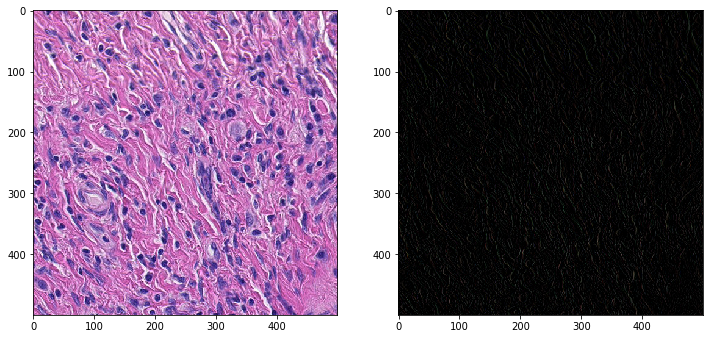

In [320]:
offset = 8
level = 1

x1 = 32000
x2 = 32001 #+ 2**level
y = 32000

size = 500
plt.figure(figsize=(12,12))
plt.subplot(121)
patch1 = np.array(img.stack.read_region((x1, y), level, (size, size)))[:,:,:3]
plt.imshow(patch1)
plt.subplot(122)
patch2 = np.array(img.stack.read_region((x2, y), level, (size, size)))[:,:,:3]
plt.imshow(patch2)

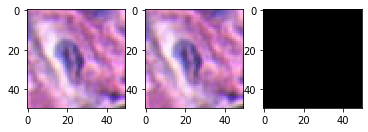

In [210]:
shift = 0
shift2 = -1
start = 100

sub_patch1 = patch1[start:start+50,start:start+50,:]
sub_patch2 = patch2[start+shift:start+50+shift,start+shift2:start+shift2+50,:]
plt.subplot(131)
plt.imshow(sub_patch1)
plt.subplot(132)
plt.imshow(sub_patch2)
plt.subplot(133)
plt.imshow(sub_patch1 - sub_patch2)

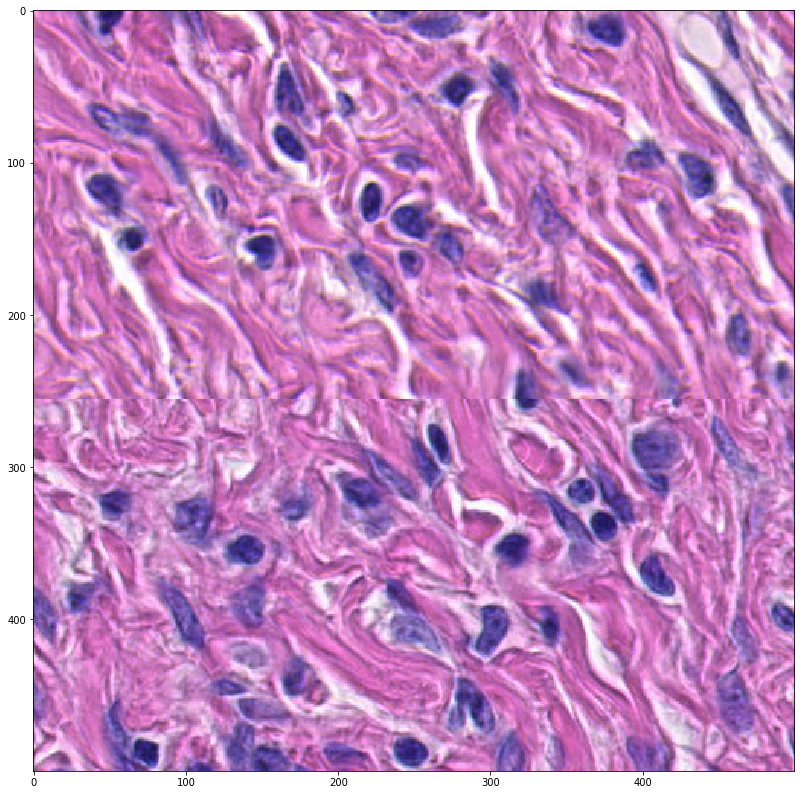

In [211]:
plt.figure(figsize=(14,14))
plt.imshow(patch2[:,:,:3])

8


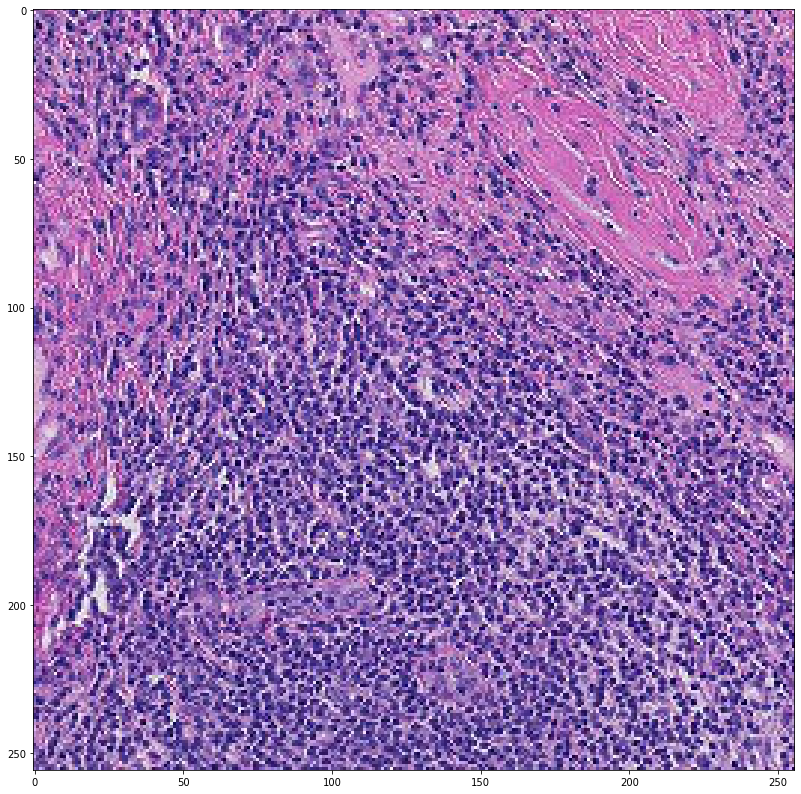

In [315]:
level = 3
size = 256

downsample = int(img.stack.properties[f'openslide.level[{level}].downsample'])
print(downsample)

x = 28928+16
y = 32000

patch1 = np.array(img.stack.read_region((x, y), level, (size, size)))[:,:,:3]
plt.figure(figsize=(14,14))
plt.imshow(patch1)

In [304]:
32000/256

125.0

In [316]:
1/0.000227273

4399.994720006336

In [317]:
1/4400

0.00022727272727272727